In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.stats as st
import random
import glob
import seaborn as sns
color = sns.color_palette('Paired', 20)
import itertools
import networkx as nx
import pandas as pd

#plt.style.use('ggplot')
plt.style.use('default')
%matplotlib inline

In [2]:
def savefig(name):
    plt.savefig(name+".svg", bbox_inches = 'tight',dpi=600,format='svg', transparent=True)

In [3]:
from collections import defaultdict
def getSeqs(filename):
    seq_list = defaultdict(list)
    mapseq_list = defaultdict(list)
    mapping = {'A': 'a', 'T': 't', 'C': 'c', 'G': 'g','a': 'a', 't': 't', 'c': 'c', 'g': 'g'}
    with open(filename) as f:
        j = -1
        for i, line in enumerate(f):
            if line.startswith('>'):
                j += 1
            else:
                this_line = list(line)
                this_line = list(filter(lambda ch: ch in 'acgtACGT', this_line))
                seq_list[j].extend(this_line)
                mapseq_list[j] = ''.join(list(map(lambda ch: mapping[ch], seq_list[j])))
    return mapseq_list

In [4]:
#comparing sequences over time
filenames = glob.glob('/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/*.fasta')
filenames.sort(key=lambda x:(x[-8],x[-7]))
# filenames.sort(key=lambda x:(x[3],x[4],x[5],x[6],x[0],x[1]))
print(filenames)
sequences = []
for filename in filenames:
    sequences.append(getSeqs(filename))

['/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/H1N1_02.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/JE_03.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Mach_04.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/StLou_05.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/BacAnt_06.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Orop_07.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/WesEqu_08.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/SinNom_09.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Venequ_10.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Monk_11.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Nipa_12.fasta', '/Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/H7N2_13.fasta', '/Users/xiongyex/Dow

In [11]:
for i,filename in enumerate(filenames):
    print(i,len(V[i]),filename)

0 2341 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/H1N1_02.fasta
1 10965 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/JE_03.fasta
2 3439 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Mach_04.fasta
3 10939 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/StLou_05.fasta
4 516 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/BacAnt_06.fasta
5 4385 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Orop_07.fasta
6 11484 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/WesEqu_08.fasta
7 3696 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/SinNom_09.fasta
8 11444 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Venequ_10.fasta
9 196858 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Monk_11.fasta
10 18246 /Users/xiongyex/Downloads/pandemic/Neha/new_data_sequence/12.18/Nipa_12.fasta
11 1709 /Users/xiongyex/Downloads/pandemic/Neha/new

In [5]:
V=[]
for seq in sequences:
    V.append(seq[0])

In [29]:
##Calculate entropy
def MC(s,b=3,k=3,beta=0.5,gamma=0.5):
    inv, l, n = k-b, len(s), 4**k
    T=np.zeros((n,n))
    count = [0]*n
    word_list = [''.join(x) for x in itertools.product('acgt', repeat=k)]
    wd = dict(zip(word_list, list(range(len(word_list)))))
    uu = []
    for i in range(k,l-b):
        n1, n2 = wd[s[i-k:i]], wd[s[i-k+b:i+b]]
        T[n1,n2] += 1
        count[n1] += 1
        
    wo_next = [''.join(x) for x in itertools.product('acgt', repeat=b)]
    for i in range(n):
        wo = word_list[i]
        for l in wo_next:
            j = wd[wo[b:]+l]
            T[i,j] = (T[i,j]+beta)/(count[i]+4**b*beta)
    sum_count = np.sum(count)+4**k*gamma
    
    prob = [(count[i]+gamma)/sum_count for i in range(len(count))] 
    n = len(T)
    F = []
    for i in range(n):
        wo = word_list[i]
        for l in wo_next:
            j = wd[wo[b:]+l]
            F.append(T[i,j])
    return T

In [7]:
from sklearn.metrics import mean_squared_error
lenm = len(V)
mat = np.zeros((lenm,lenm))
for i in range(lenm-1):
    for j in range(i+1,lenm):
        T1 = MC(V[i])
        T2 = MC(V[j])
        T1 = np.array(T1)
        T2 = np.array(T2)
        dist = np.sqrt(np.trace(np.dot((T1-T2),np.transpose(T1-T2))))
        mat[i][j] = dist
        mat[j][i] = dist

In [29]:
T1.shape

(64, 64)

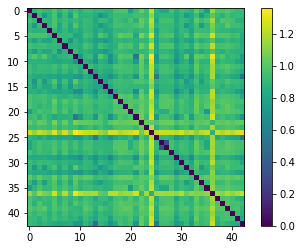

In [8]:
plt.imshow(mat)
plt.colorbar()

In [14]:
from sklearn.metrics import mean_squared_error
lenm = len(V)
mat = np.zeros((lenm,lenm))
for i in range(lenm-1):
    for j in range(i+1,lenm):
        F1,_ = MC(V[i])
        F2,_ = MC(V[j])
        dist = np.sqrt(mean_squared_error(F1, F2)*64*64)
        mat[i][j] = dist
        mat[j][i] = dist

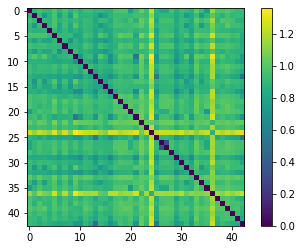

In [15]:
plt.imshow(mat)
plt.colorbar()

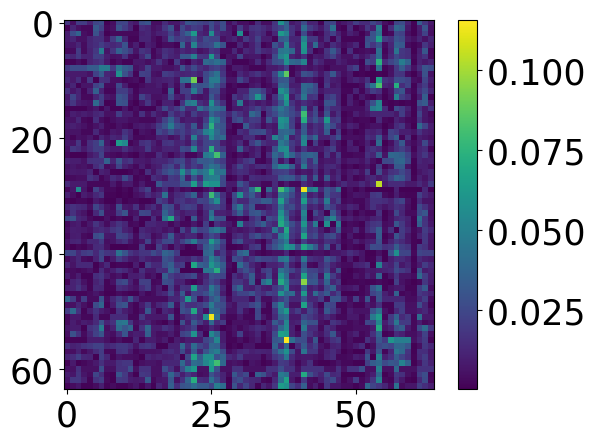

In [83]:
F,T = MC(V[24])
plt.imshow(T)

plt.colorbar()

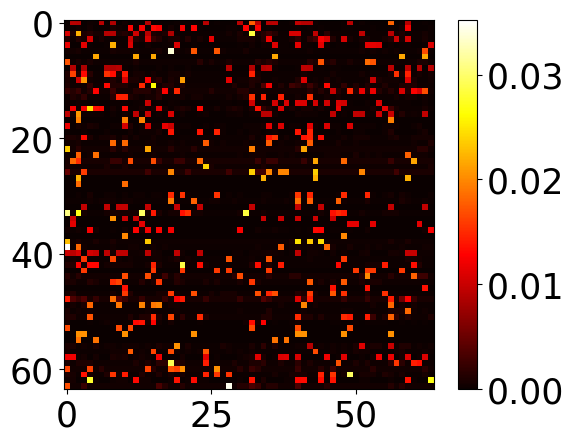

In [87]:
F1,T1 = MC(V[26])
F2,T2 = MC(V[27])

plt.imshow(abs(T1-T2),cmap='hot')

plt.colorbar()

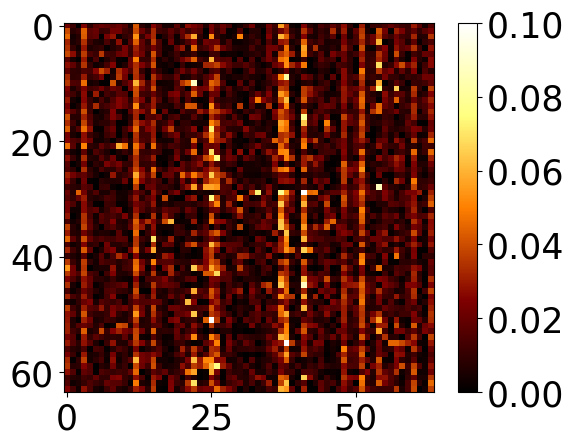

In [81]:
F1,T1 = MC(V[9])
F2,T2 = MC(V[24])

plt.imshow(abs(T1-T2),cmap='afmhot',vmin=0, vmax=0.1)

plt.colorbar()

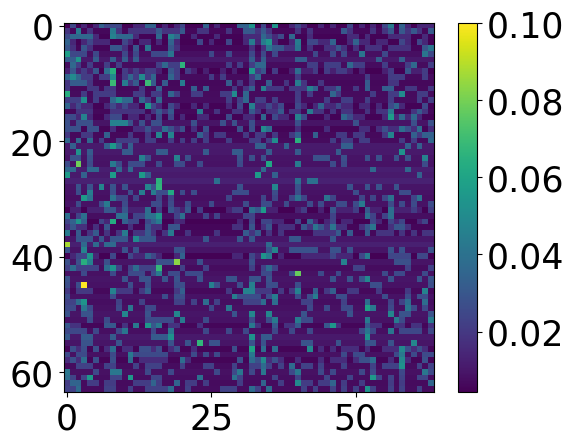

In [40]:
F2,T2 = MC(V[0])
plt.imshow(T2)

plt.colorbar()

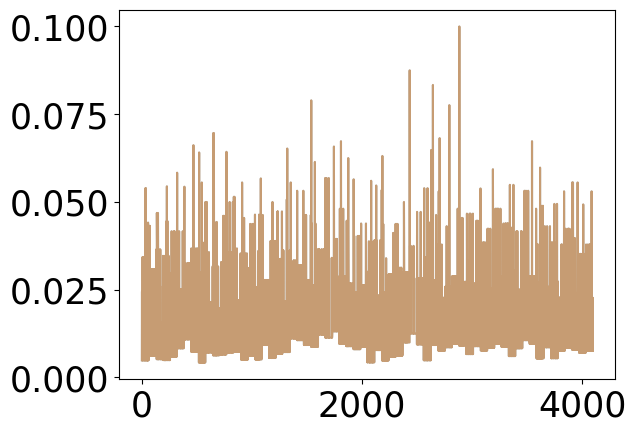

In [44]:
length_list = []
plt.plot(range(len(F)),F,alpha=0.5)
plt.plot(range(len(F2)),F2,alpha=0.5)

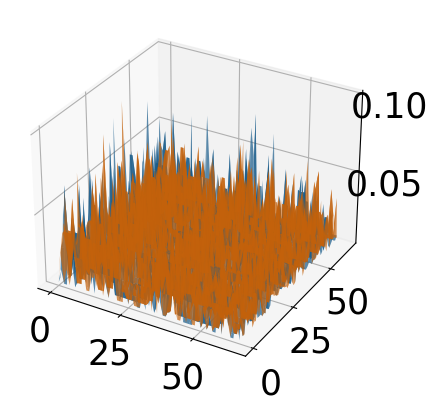

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
 
Y = np.arange(0, np.shape(T)[0], 1)
X = np.arange(0, np.shape(T)[1], 1)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(X, Y, T,alpha=0.7)

ax.plot_surface(X, Y, T2,alpha=0.7)

In [7]:
_,T1 = MC(V[9])
_,T2 = MC(V[24])
_,T3 = MC(V[26])
_,T4 = MC(V[27])

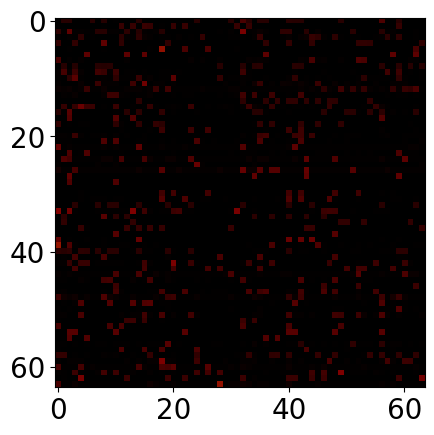

In [16]:
plt.style.use('default')
# f=plt.figure(figsize=[12,8])
plt.rcParams.update({'font.size': 20})
plt.imshow(abs(T3-T4),cmap='afmhot',vmin=0, vmax=0.12)

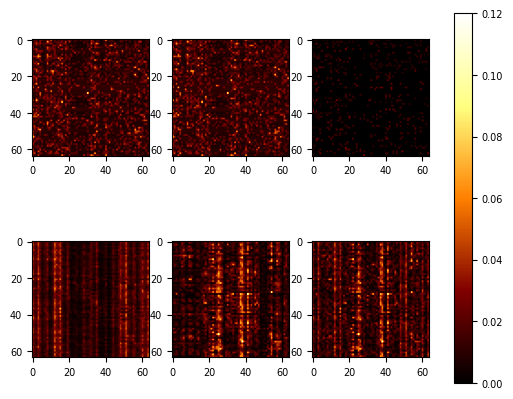

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
# f=plt.figure(figsize=[12,8])
plt.rcParams.update({'font.size': 7})

data = []
data.append(T3)
data.append(T4)
data.append(abs(T3-T4))
data.append(T1)
data.append(T2)
data.append(abs(T1-T2))

vmin = 0
vmax = 0.12
fig, axes = plt.subplots(nrows=2, ncols=3)
for i,ax in enumerate(axes.flat):
    
    im = ax.imshow(data[i] , vmin = vmin, vmax = vmax, cmap = 'afmhot')

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
